In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import geopandas as gpd
import matplotlib
from pathlib import Path
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error ,r2_score
import enum;

Mounted at /content/drive


In [ ]:
pip install --upgrade xlrd;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 2.7 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


#Pojuca

##7-MGP-40D-BA

In [ ]:
core_POJ = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-MPG-40D-BA/Core Final 7-MGP-40D-BA POJ.xlsx"
core_POJ = pd.read_excel(core_POJ)

In [ ]:
core_POJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIRECAO AMOSTRA    203 non-null    object 
 1   MD                 203 non-null    float64
 2   Poro_Core_%        203 non-null    float64
 3   Gran_Density_g/cc  203 non-null    float64
 4   Kh_mD              194 non-null    float64
 5   LogKh_mD           194 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.6+ KB


In [ ]:
not_Nan = core_POJ["Kh_mD"].notnull().values
core_POJ = core_POJ[not_Nan]

In [ ]:
core_POJ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 4 to 202
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIRECAO AMOSTRA    194 non-null    object 
 1   MD                 194 non-null    float64
 2   Poro_Core_%        194 non-null    float64
 3   Gran_Density_g/cc  194 non-null    float64
 4   Kh_mD              194 non-null    float64
 5   LogKh_mD           194 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.6+ KB


In [ ]:
core_POJ = core_POJ.sort_values(by=["MD"])

In [ ]:
# from google.colab import files
# core_POJ.to_excel("Core Calibrado 7-MGP-40D-BA POJ.xlsx",index=False)
# files.download("Core Calibrado 7-MGP-40D-BA POJ.xlsx")

In [ ]:
registro_7MPG ="/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-MPG-40D-BA/7-MGP-40D-BA Log.xlsx"
registro_7MPG = pd.read_excel(registro_7MPG)

In [ ]:
registro_7MPG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9672 entries, 0 to 9671
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MD      9672 non-null   float64
 1   GR      9672 non-null   float64
 2   BS      9672 non-null   float64
 3   CALI    9672 non-null   float64
 4   RT      9672 non-null   float64
 5   RHOB    9672 non-null   float64
 6   NPHI    9672 non-null   float64
 7   DPHI    9672 non-null   float64
 8   PEF     9672 non-null   float64
 9   SPHI    9672 non-null   float64
 10  DT      9672 non-null   float64
 11  DRHO    9672 non-null   float64
dtypes: float64(12)
memory usage: 906.9 KB


In [ ]:
GRshmgp = registro_7MPG[(1800<=registro_7MPG["MD"]) & (registro_7MPG["MD"]<=1900)]
GRmaxmgp = GRshmgp["GR"].max()
GRminmgp = GRshmgp["GR"].min()
print(f"El GR maximo es: {GRmaxmgp}\nEl GR mínimo es {GRminmgp}")

El GR maximo es: 128.1175537109375
El GR mínimo es 17.73966979980469


In [ ]:
GRshmgp.loc[GRshmgp["GR"]==GRmaxmgp,["MD"]]

,MD
2649,1820.570435


In [ ]:
registro_7MPG["Vshlin"] = (registro_7MPG["GR"]-GRminmgp)/(GRmaxmgp-GRminmgp)

In [ ]:
registro_7MPG_arena = registro_7MPG[(1947.824462890625<=registro_7MPG["MD"]) & (registro_7MPG["MD"]<=1977.237670898438)]

In [ ]:
registro_7MPG_arena.describe()

,MD,GR,BS,CALI,RT,RHOB,NPHI,DPHI,PEF,SPHI,DT,DRHO,Vshlin
count,194.000000,194.000000,194.0,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1962.531012,42.601192,8.5,8.647979,6.732970,2.346494,0.185545,0.212576,2.587137,0.197020,81.856476,-0.010535,0.225240
std,8.556823,8.101882,0.0,0.127394,1.579988,0.037467,0.015974,0.021911,0.225563,0.013343,2.482781,0.005601,0.073401
min,1947.824463,27.680588,8.5,8.528484,3.190439,2.275893,0.115856,0.138030,2.230078,0.145343,72.968750,-0.021693,0.090063
25%,1955.177734,38.290426,8.5,8.559037,5.820468,2.323852,0.179217,0.203791,2.430574,0.189017,80.278320,-0.014661,0.186185
50%,1962.531006,40.884266,8.5,8.592724,6.701804,2.338874,0.187282,0.217033,2.537452,0.199347,82.226562,-0.010223,0.209685
75%,1969.884277,45.342707,8.5,8.681332,7.509866,2.361517,0.195763,0.225817,2.692693,0.207163,83.764648,-0.006958,0.250078
max,1977.237671,74.089844,8.5,9.042404,15.731445,2.473969,0.214936,0.253864,3.495742,0.219387,86.289062,0.002326,0.510521


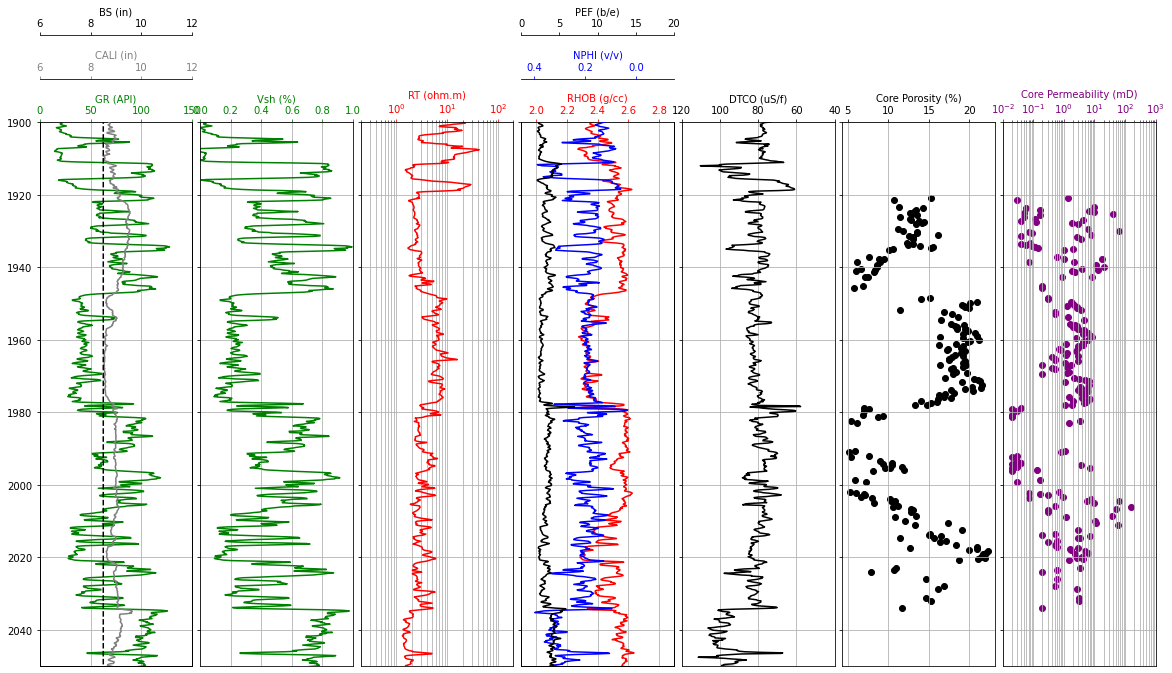

In [ ]:
fig, axes = plt.subplots(figsize=(20,10),sharey=True)

ax1 = plt.subplot2grid((1,7),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,7),(0,1),rowspan=1,colspan=1)
ax5 = plt.subplot2grid((1,7),(0,2),rowspan=1,colspan=1)
ax6 = plt.subplot2grid((1,7),(0,3),rowspan=1,colspan=1)
ax7 = ax6.twiny()
ax8 = ax6.twiny()
ax9 = plt.subplot2grid((1,7),(0,4),rowspan=1,colspan=1)
ax10 = plt.subplot2grid((1,7),(0,5),rowspan=1,colspan=1)
ax11 = plt.subplot2grid((1,7),(0,6),rowspan=1,colspan=1)


ax1.plot("GR","MD",data=registro_7MPG,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("CALI","MD",data=registro_7MPG,color="gray")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="gray")
ax2.tick_params(axis="x",colors="gray")

ax3.plot("BS","MD",data=registro_7MPG,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("Vshlin","MD",data=registro_7MPG,color="green")
ax4.set_xlim(0,1)
ax4.set_xlabel("Vsh (%)",color="green")
ax4.tick_params(axis="x",colors="green")

ax5.plot("RT","MD",data=registro_7MPG,color="red")
ax5.set_xlim(0.2,200)
ax5.semilogx()
ax5.grid(which="minor")
ax5.set_xlabel("RT (ohm.m)",color="red")
ax5.tick_params(axis="x",colors="red")

ax6.plot("RHOB","MD",data=registro_7MPG,color="red")
ax6.set_xlim(1.9,2.9)
ax6.grid(which="minor")
ax6.set_xlabel("RHOB (g/cc)",color="red")
ax6.tick_params(axis="x",colors="red")

ax7.plot("NPHI","MD",data=registro_7MPG,color="blue")
ax7.set_xlim(0.45,-0.15)
ax7.set_xlabel("NPHI (v/v)",color="blue")
ax7.tick_params(axis="x",colors="blue")

ax8.plot("PEF","MD",data=registro_7MPG,color="black")
ax8.set_xlim(0,20)
ax8.set_xlabel("PEF (b/e)",color="black")
ax8.tick_params(axis="x",colors="black")

ax9.plot("DT","MD",data=registro_7MPG,color="black")
ax9.set_xlim(120,40)
ax9.set_xlabel("DTCO (uS/f)",color="black")
ax9.tick_params(axis="x",colors="black")

ax10.scatter("Poro_Core_%","MD",data=core_POJ,color="black")
ax10.set_xlabel("Core Porosity (%)",color="black")
ax10.tick_params(axis="x",colors="black")

ax11.scatter("Kh_mD","MD",data=core_POJ,color="purple")
ax11.semilogx()
ax11.set_xlim(0.01,1000)
ax11.grid(which="minor")
ax11.set_xlabel("Core Permeability (mD)",color="purple")
ax11.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(2050,1900)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==6:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==7 or i==2:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
# Neutron_Shale = registro_7MPG.iloc[2649,:]
Neutron_Shale = 0.4
Densidad_Shale = GRshmgp["DPHI"].min()

In [ ]:
registro_7MPG["PHIEn"] = registro_7MPG["NPHI"] - registro_7MPG["Vshlin"]*Neutron_Shale
registro_7MPG["PHIEd"] = registro_7MPG["DPHI"] - registro_7MPG["Vshlin"]*Densidad_Shale

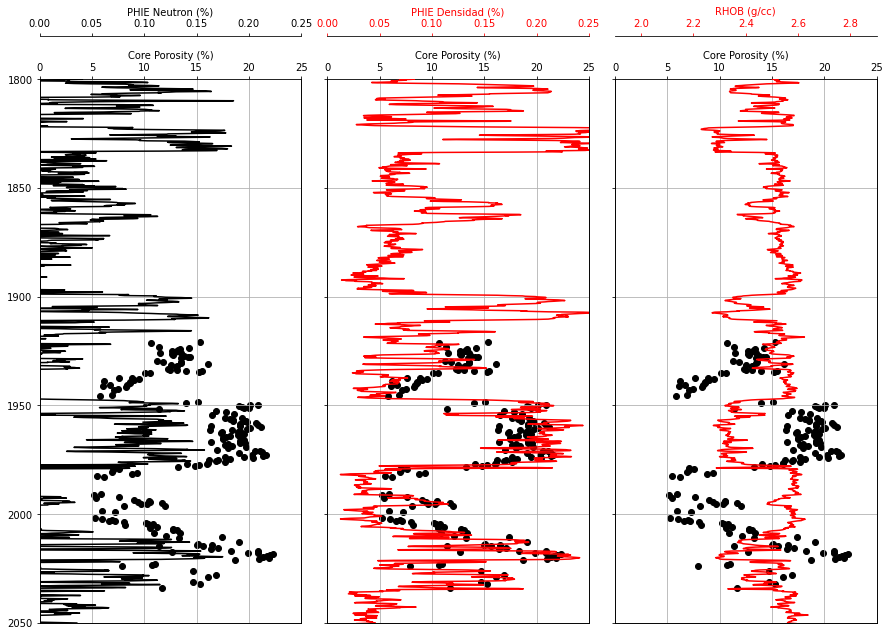

In [ ]:
fig, axes = plt.subplots(figsize=(15,10),sharey=True)

ax1 = plt.subplot2grid((1,3),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = plt.subplot2grid((1,3),(0,1),rowspan=1,colspan=1)
ax4 = ax3.twiny()
ax5 = plt.subplot2grid((1,3),(0,2),rowspan=1,colspan=1)
ax6 = ax5.twiny()

ax1.scatter("Poro_Core_%","MD",data=core_POJ,color="black")
ax1.set_xlabel("Core Porosity (%)",color="black")
ax1.tick_params(axis="x",colors="black")
ax1.set_xlim(0,25)

ax2.plot("PHIEn","MD",data=registro_7MPG,color="black")
ax2.set_xlim(0,0.25)
ax2.set_xlabel("PHIE Neutron (%)",color="black")
ax2.tick_params(axis="x",colors="black")

ax3.scatter("Poro_Core_%","MD",data=core_POJ,color="black")
ax3.set_xlabel("Core Porosity (%)",color="black")
ax3.tick_params(axis="x",colors="black")
ax3.set_xlim(0,25)

ax4.plot("PHIEd","MD",data=registro_7MPG,color="red")
ax4.set_xlim(0,0.25)
ax4.set_xlabel("PHIE Densidad (%)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.scatter("Poro_Core_%","MD",data=core_POJ,color="black")
ax5.set_xlabel("Core Porosity (%)",color="black")
ax5.tick_params(axis="x",colors="black")
ax5.set_xlim(0,25)

ax6.plot("RHOB","MD",data=registro_7MPG,color="red")
ax6.set_xlim(1.9,2.9)
ax6.grid(which="minor")
ax6.set_xlabel("RHOB (g/cc)",color="red")
ax6.tick_params(axis="x",colors="red")


for i, ax in enumerate(fig.axes):
    ax.set_ylim(2050,1800)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==3 or i==5:
        ax.spines["top"].set_position(("axes",1.08))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.1)

In [ ]:
from google.colab import files
registro_7MPG.to_excel("Log P 7-JND-3D-BA AG.xlsx",index=False)
files.download("Log P 7-JND-3D-BA AG.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Agua Grande

##7-JND-3D-BA

In [ ]:
core_3D = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-JND-3D-BA/Core Final 7-JND-3D-BA AG.xlsx"
core_3D = pd.read_excel(core_3D)

In [ ]:
core_3D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIRECAO AMOSTRA    77 non-null     object 
 1   MD                 77 non-null     float64
 2   Poro_Core_%        77 non-null     float64
 3   Gran_Density_g/cc  77 non-null     float64
 4   Kh_mD              77 non-null     float64
 5   LogKh_mD           77 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.7+ KB


In [ ]:
registro_7JND = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-JND-3D-BA/7-JND-3D-BA Log.xlsx"
registro_7JND = pd.read_excel(registro_7JND)

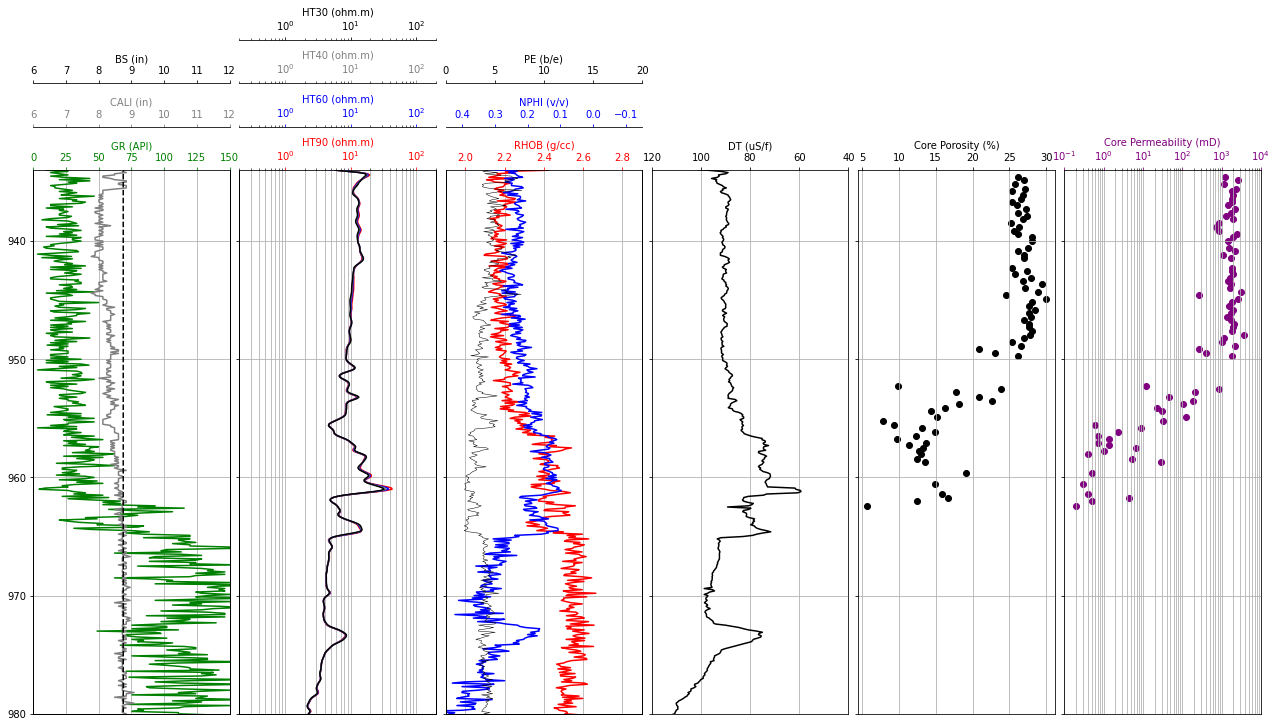

In [ ]:
fig, axes = plt.subplots(figsize=(22,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax7 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax11 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("CALI","MD",data=registro_7JND,color="gray")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="gray")
ax2.tick_params(axis="x",colors="gray")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("HT90","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,200)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("HT90 (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("HT60","MD",data=registro_7JND,color="blue")
ax5.set_xlim(0.2,200)
ax5.semilogx()
ax5.set_xlabel("HT60 (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("HT40","MD",data=registro_7JND,color="gray")
ax6.set_xlim(0.2,200)
ax6.semilogx()
ax6.set_xlabel("HT40 (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax7.plot("HT30","MD",data=registro_7JND,color="black")
ax7.set_xlim(0.2,200)
ax7.semilogx()
ax7.set_xlabel("HT30 (ohm.m)",color="black")
ax7.tick_params(axis="x",colors="black")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(1.9,2.9)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHI","MD",data=registro_7JND,color="blue")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHI (v/v)",color="blue")
ax9.tick_params(axis="x",colors="blue")

ax10.plot("PE","MD",data=registro_7JND,linestyle="-",color="black",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="black")
ax10.tick_params(axis="x",colors="black")

ax11.plot("DT","MD",data=registro_7JND,linestyle="-",color="black")
ax11.set_xlim(120,40)
ax11.set_xlabel("DT (uS/f)",color="black")
ax11.tick_params(axis="x",colors="black")

ax12.scatter("Poro_Core_%","MD",data=core_3D,color="black")
ax12.set_xlabel("Core Porosity (%)",color="black")
ax12.tick_params(axis="x",colors="black")

ax13.scatter("Kh_mD","MD",data=core_3D,color="purple")
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(980,934)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==8:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==9:
        ax.spines["top"].set_position(("axes",1.16))
    elif i==6:
        ax.spines["top"].set_position(("axes",1.24))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
GRsh3d = registro_7JND[(934<registro_7JND["MD"]) & (registro_7JND["MD"]<980)]
GRmax3d = GRsh3d["GR"].max()
GRmin3d = GRsh3d["GR"].min()
print(f"El GR maximo es: {GRmax3d}\nEl GR mínimo es {GRmin3d}")

El GR maximo es: 177.4033355712891
El GR mínimo es 3.32631254196167


In [ ]:
registro_7JND["Vshlin"] = (registro_7JND["GR"]-GRmin3d)/(GRmax3d-GRmin3d)

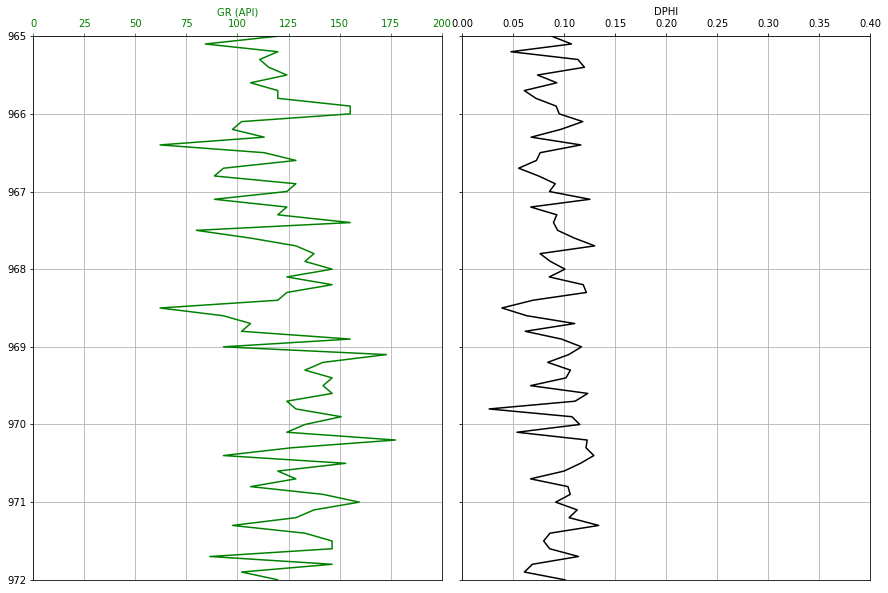

In [ ]:
fig, axes = plt.subplots(figsize=(15,10),sharey=True)

ax1 = plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,2),(0,1),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,200)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("DPHI","MD",data=registro_7JND,color="black")
ax2.set_xlim(0,0.4)
ax2.set_xlabel("DPHI",color="black")
ax2.tick_params(axis="x",colors="black")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(972,965)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    ax.grid()

for ax in [ax2]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
Shale3d = registro_7JND[(965<registro_7JND["MD"]) & (registro_7JND["MD"]<972)]
Neutron_Shale3d = Shale3d["NPHI"].max()
Densidad_Shale3d = Shale3d["DPHI"].min()

In [ ]:
Densidad_Shale3d

0.02656373381614685

In [ ]:
registro_7JND["PHIEn"] = registro_7JND["NPHI"] - registro_7JND["Vshlin"]*Neutron_Shale3d
registro_7JND["PHIEd"] = registro_7JND["DPHI"] - registro_7JND["Vshlin"]*Densidad_Shale3d
registro_7JND["PHIEn-d"] = (registro_7JND["PHIEn"]+registro_7JND["PHIEd"])/2

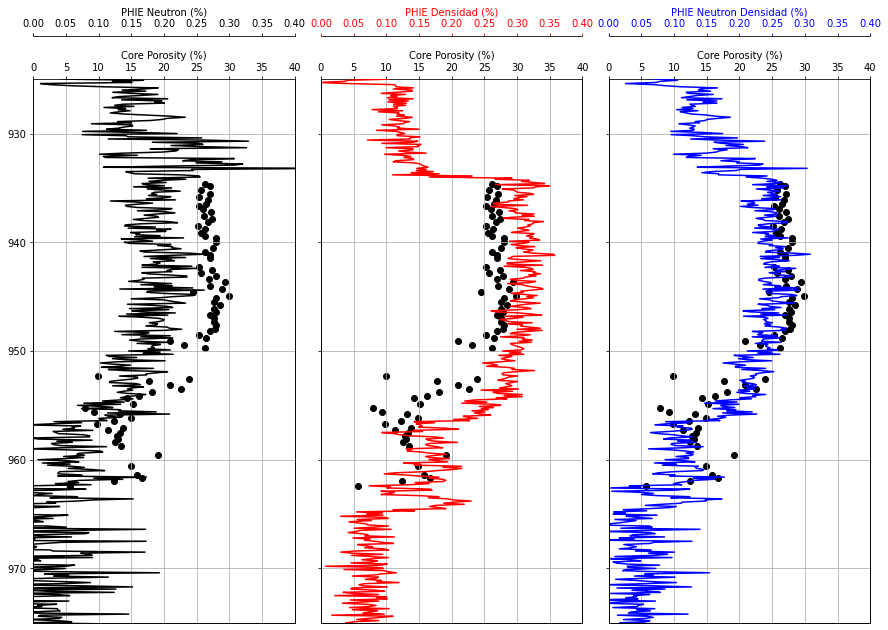

In [ ]:
fig, axes = plt.subplots(figsize=(15,10),sharey=True)

ax1 = plt.subplot2grid((1,3),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = plt.subplot2grid((1,3),(0,1),rowspan=1,colspan=1)
ax4 = ax3.twiny()
ax5 = plt.subplot2grid((1,3),(0,2),rowspan=1,colspan=1)
ax6 = ax5.twiny()

ax1.scatter("Poro_Core_%","MD",data=core_3D,color="black")
ax1.set_xlabel("Core Porosity (%)",color="black")
ax1.tick_params(axis="x",colors="black")
ax1.set_xlim(0,40)

ax2.plot("PHIEn","MD",data=registro_7JND,color="black")
ax2.set_xlim(0,0.4)
ax2.set_xlabel("PHIE Neutron (%)",color="black")
ax2.tick_params(axis="x",colors="black")

ax3.scatter("Poro_Core_%","MD",data=core_3D,color="black")
ax3.set_xlabel("Core Porosity (%)",color="black")
ax3.tick_params(axis="x",colors="black")
ax3.set_xlim(0,40)

ax4.plot("PHIEd","MD",data=registro_7JND,color="red")
ax4.set_xlim(0,0.4)
ax4.set_xlabel("PHIE Densidad (%)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.scatter("Poro_Core_%","MD",data=core_3D,color="black")
ax5.set_xlabel("Core Porosity (%)",color="black")
ax5.tick_params(axis="x",colors="black")
ax5.set_xlim(0,40)

ax6.plot("PHIEn-d","MD",data=registro_7JND,color="blue")
ax6.set_xlim(0,0.4)
ax6.set_xlabel("PHIE Neutron Densidad (%)",color="blue")
ax6.tick_params(axis="x",colors="blue")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(975,925)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==3 or i==5:
        ax.spines["top"].set_position(("axes",1.08))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.1)

In [ ]:
core_3D["MD"] = core_3D["MD"]+2

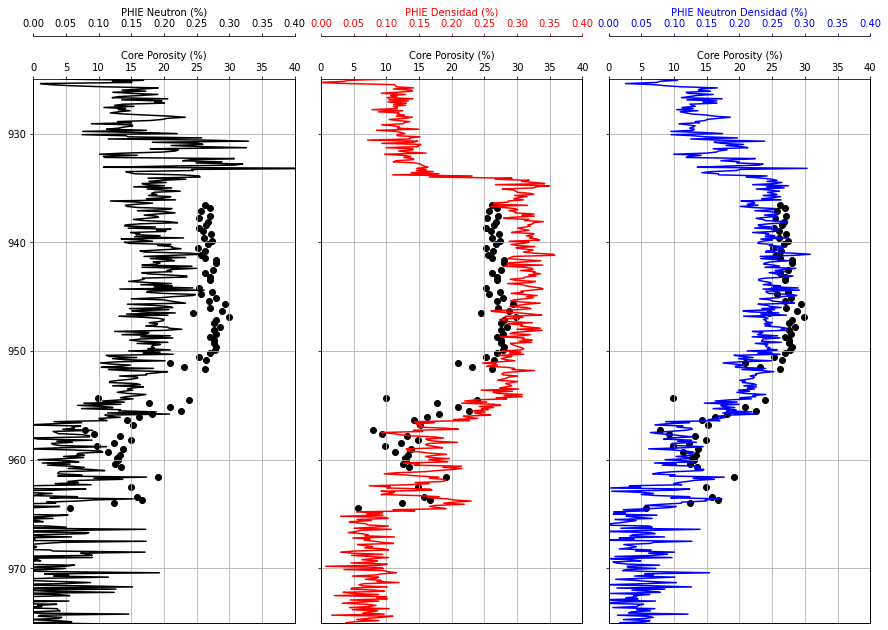

In [ ]:
fig, axes = plt.subplots(figsize=(15,10),sharey=True)

ax1 = plt.subplot2grid((1,3),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = plt.subplot2grid((1,3),(0,1),rowspan=1,colspan=1)
ax4 = ax3.twiny()
ax5 = plt.subplot2grid((1,3),(0,2),rowspan=1,colspan=1)
ax6 = ax5.twiny()

ax1.scatter("Poro_Core_%","MD",data=core_3D,color="black")
ax1.set_xlabel("Core Porosity (%)",color="black")
ax1.tick_params(axis="x",colors="black")
ax1.set_xlim(0,40)

ax2.plot("PHIEn","MD",data=registro_7JND,color="black")
ax2.set_xlim(0,0.4)
ax2.set_xlabel("PHIE Neutron (%)",color="black")
ax2.tick_params(axis="x",colors="black")

ax3.scatter("Poro_Core_%","MD",data=core_3D,color="black")
ax3.set_xlabel("Core Porosity (%)",color="black")
ax3.tick_params(axis="x",colors="black")
ax3.set_xlim(0,40)

ax4.plot("PHIEd","MD",data=registro_7JND,color="red")
ax4.set_xlim(0,0.4)
ax4.set_xlabel("PHIE Densidad (%)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.scatter("Poro_Core_%","MD",data=core_3D,color="black")
ax5.set_xlabel("Core Porosity (%)",color="black")
ax5.tick_params(axis="x",colors="black")
ax5.set_xlim(0,40)

ax6.plot("PHIEn-d","MD",data=registro_7JND,color="blue")
ax6.set_xlim(0,0.4)
ax6.set_xlabel("PHIE Neutron Densidad (%)",color="blue")
ax6.tick_params(axis="x",colors="blue")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(975,925)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==3 or i==5:
        ax.spines["top"].set_position(("axes",1.08))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.1)

In [ ]:
# from google.colab import files
# core_3D.to_excel("Core Calibrado 7-JND-3D-BA AG.xlsx",index=False)
# files.download("Core Calibrado 7-JND-3D-BA AG.xlsx")

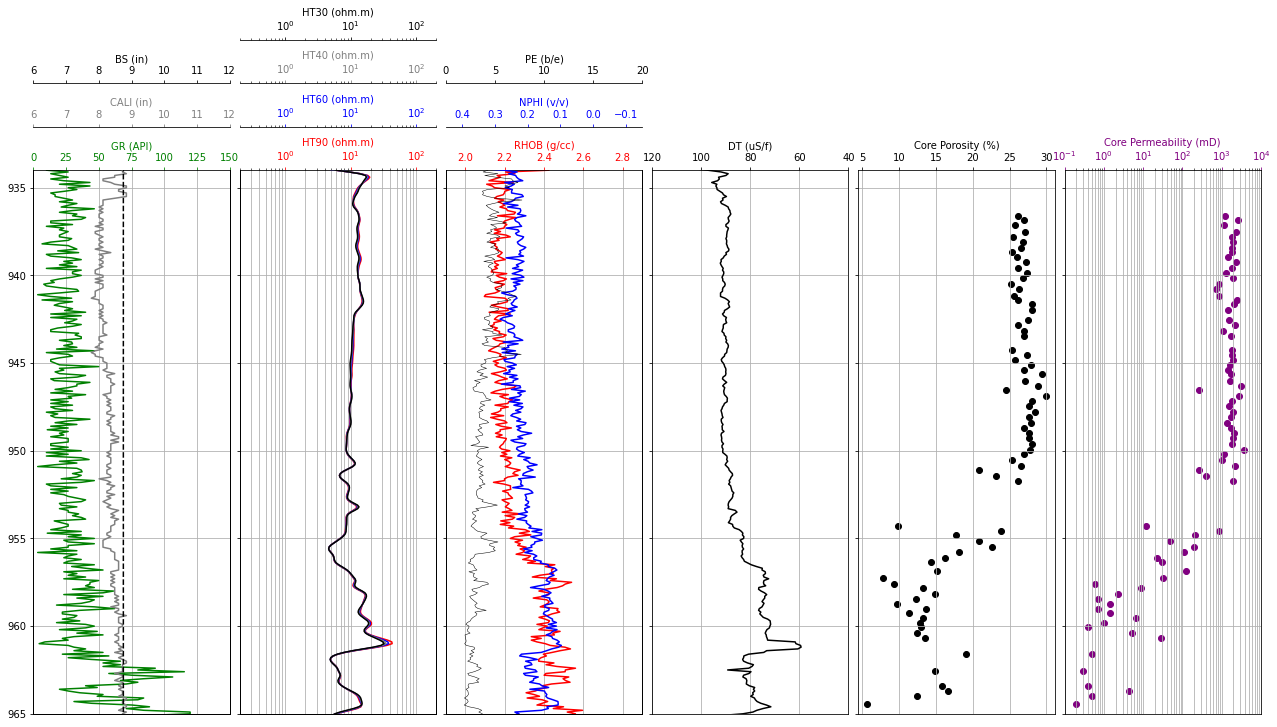

In [ ]:
fig, axes = plt.subplots(figsize=(22,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax7 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax11 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("CALI","MD",data=registro_7JND,color="gray")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="gray")
ax2.tick_params(axis="x",colors="gray")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("HT90","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,200)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("HT90 (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("HT60","MD",data=registro_7JND,color="blue")
ax5.set_xlim(0.2,200)
ax5.semilogx()
ax5.set_xlabel("HT60 (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("HT40","MD",data=registro_7JND,color="gray")
ax6.set_xlim(0.2,200)
ax6.semilogx()
ax6.set_xlabel("HT40 (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax7.plot("HT30","MD",data=registro_7JND,color="black")
ax7.set_xlim(0.2,200)
ax7.semilogx()
ax7.set_xlabel("HT30 (ohm.m)",color="black")
ax7.tick_params(axis="x",colors="black")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(1.9,2.9)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHI","MD",data=registro_7JND,color="blue")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHI (v/v)",color="blue")
ax9.tick_params(axis="x",colors="blue")

ax10.plot("PE","MD",data=registro_7JND,linestyle="-",color="black",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="black")
ax10.tick_params(axis="x",colors="black")

ax11.plot("DT","MD",data=registro_7JND,linestyle="-",color="black")
ax11.set_xlim(120,40)
ax11.set_xlabel("DT (uS/f)",color="black")
ax11.tick_params(axis="x",colors="black")

ax12.scatter("Poro_Core_%","MD",data=core_3D,color="black")
ax12.set_xlabel("Core Porosity (%)",color="black")
ax12.tick_params(axis="x",colors="black")

ax13.scatter("Kh_mD","MD",data=core_3D,color="purple")
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(965,934)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==8:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==9:
        ax.spines["top"].set_position(("axes",1.16))
    elif i==6:
        ax.spines["top"].set_position(("axes",1.24))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

##7-JND-13D-BA

In [ ]:
core_13JND = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-JND-13D-BA/Core Final 7-JND-13D-BA AG.xlsx"
core_13JND = pd.read_excel(core_13JND)

In [ ]:
core_13JND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIRECAO AMOSTRA    38 non-null     object 
 1   MD                 38 non-null     float64
 2   Poro_Core_%        38 non-null     float64
 3   Gran_Density_g/cc  38 non-null     float64
 4   Kh_mD              38 non-null     float64
 5   LogKh_mD           38 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.9+ KB


In [ ]:
registro_13JND = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-JND-13D-BA/7-JND-13D-BA Log.xlsx"
registro_13JND = pd.read_excel(registro_13JND)

In [ ]:
registro_13JND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MD      6884 non-null   float64
 1   GR      6884 non-null   float64
 2   RT      6884 non-null   float64
 3   NPHI    6884 non-null   float64
 4   BS      6884 non-null   float64
 5   PEFZ    6884 non-null   float64
 6   RHOZ    6884 non-null   float64
 7   DPHZ    6884 non-null   float64
 8   AHT90   6884 non-null   float64
 9   AHT60   6884 non-null   float64
 10  AHT30   6884 non-null   float64
 11  AHT20   6884 non-null   float64
 12  HCAL    6884 non-null   float64
dtypes: float64(13)
memory usage: 699.3 KB


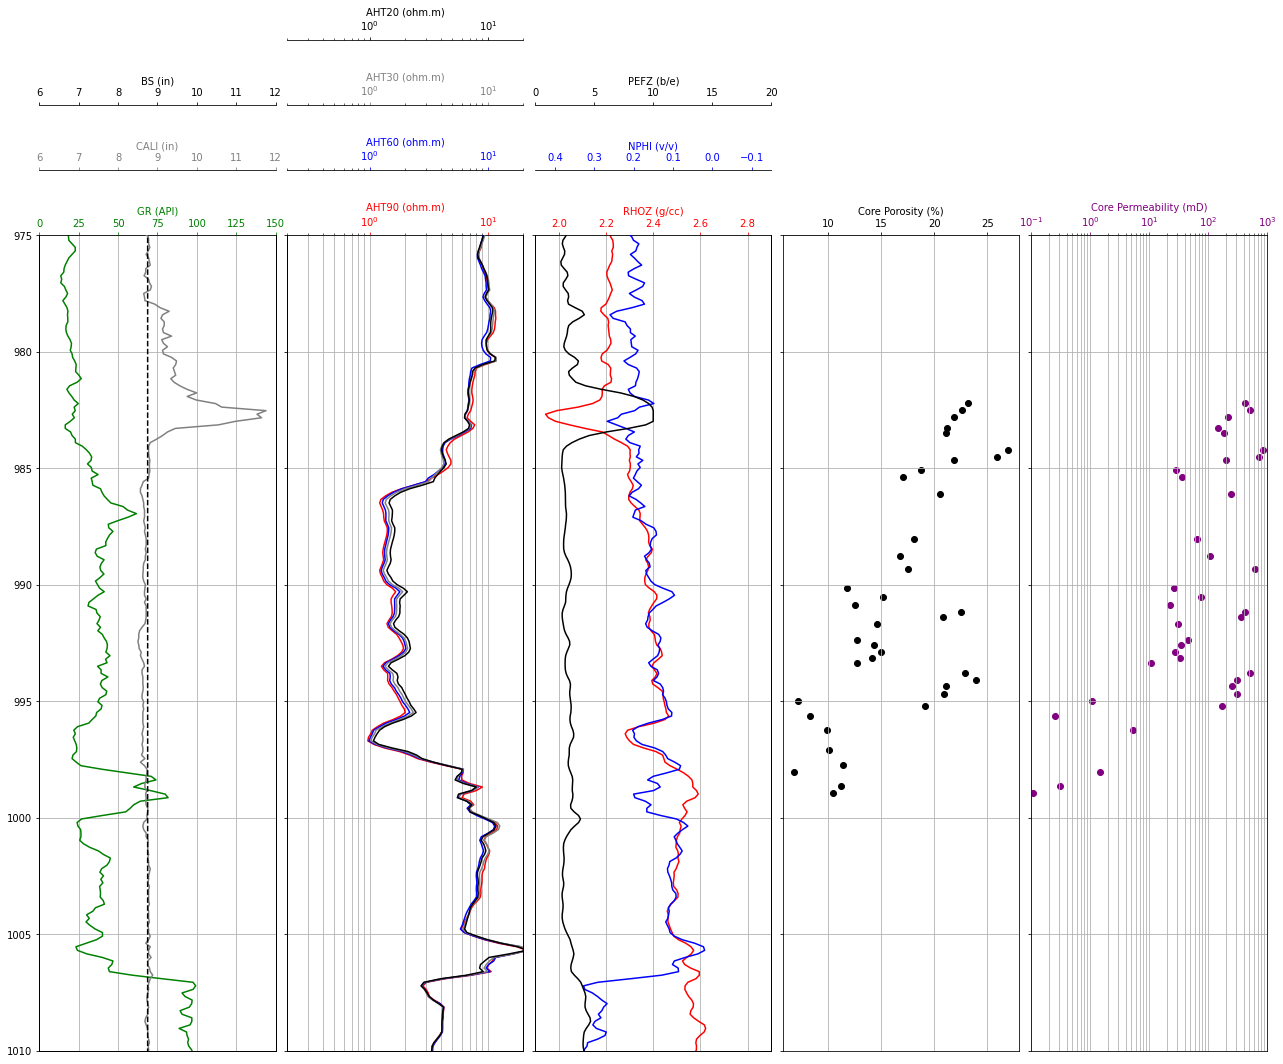

In [ ]:
fig, axes = plt.subplots(figsize=(22,15),sharey=True)

ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax7 = ax4.twiny()
ax8 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax11 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax12 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)


ax1.plot("GR","MD",data=registro_13JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("HCAL","MD",data=registro_13JND,color="gray")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="gray")
ax2.tick_params(axis="x",colors="gray")

ax3.plot("BS","MD",data=registro_13JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("AHT90","MD",data=registro_13JND,color="red")
ax4.set_xlim(0.2,20)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("AHT90 (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("AHT60","MD",data=registro_13JND,color="blue")
ax5.set_xlim(0.2,20)
ax5.semilogx()
ax5.set_xlabel("AHT60 (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("AHT30","MD",data=registro_13JND,color="gray")
ax6.set_xlim(0.2,20)
ax6.semilogx()
ax6.set_xlabel("AHT30 (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax7.plot("AHT20","MD",data=registro_13JND,color="black")
ax7.set_xlim(0.2,20)
ax7.semilogx()
ax7.set_xlabel("AHT20 (ohm.m)",color="black")
ax7.tick_params(axis="x",colors="black")

ax8.plot("RHOZ","MD",data=registro_13JND,color="red")
ax8.set_xlim(1.9,2.9)
ax8.grid(which="minor")
ax8.set_xlabel("RHOZ (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHI","MD",data=registro_13JND,color="blue")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHI (v/v)",color="blue")
ax9.tick_params(axis="x",colors="blue")

ax10.plot("PEFZ","MD",data=registro_13JND,linestyle="-",color="black")
ax10.set_xlim(0,20)
ax10.set_xlabel("PEFZ (b/e)",color="black")
ax10.tick_params(axis="x",colors="black")

ax11.scatter("Poro_Core_%","MD",data=core_13JND,color="black")
ax11.set_xlabel("Core Porosity (%)",color="black")
ax11.tick_params(axis="x",colors="black")

ax12.scatter("Kh_mD","MD",data=core_13JND,color="purple")
ax12.semilogx()
ax12.set_xlim(0.1,1000)
ax12.grid(which="minor")
ax12.set_xlabel("Core Permeability (mD)",color="purple")
ax12.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1010,975)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==8:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==9:
        ax.spines["top"].set_position(("axes",1.16))
    elif i==6:
        ax.spines["top"].set_position(("axes",1.24))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

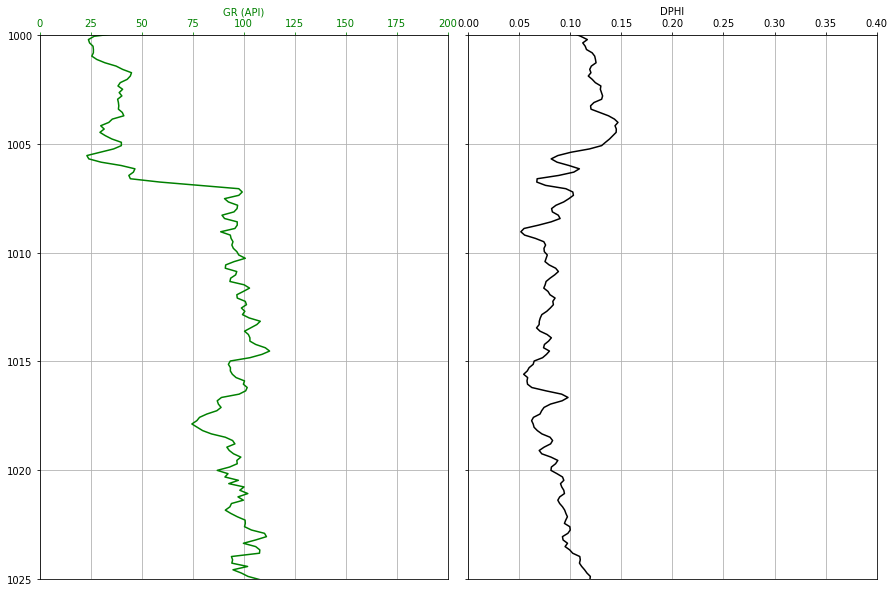

In [ ]:
fig, axes = plt.subplots(figsize=(15,10),sharey=True)

ax1 = plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,2),(0,1),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_13JND,color="green")
ax1.set_xlim(0,200)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("DPHZ","MD",data=registro_13JND,color="black")
ax2.set_xlim(0,0.4)
ax2.set_xlabel("DPHI",color="black")
ax2.tick_params(axis="x",colors="black")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1025,1000)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    ax.grid()

for ax in [ax2]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
Shale13d = registro_13JND[(1000<registro_13JND["MD"]) & (registro_13JND["MD"]<1025)]

In [ ]:
# Neutron_Shale = Shale["NPHI"].max()
Neutron_Shale13d = 0.45
Densidad_Shale13d = Shale13d["DPHZ"].min()

In [ ]:
GRsh13d = registro_13JND[(950<registro_13JND["MD"]) & (registro_13JND["MD"]<1025)]
GRmax13d = GRsh13d["GR"].max()
GRmin13d = GRsh13d["GR"].min()
print(f"El GR maximo es: {GRmax13d}\nEl GR mínimo es {GRmin13d}")

El GR maximo es: 112.6766357421875
El GR mínimo es 13.56144714355469


In [ ]:
registro_13JND["Vshlin"] = (registro_13JND["GR"]-GRmin13d)/(GRmax13d-GRmin13d)

In [ ]:
registro_13JND["PHIEn"] = registro_13JND["NPHI"] - registro_13JND["Vshlin"]*Neutron_Shale13d
registro_13JND["PHIEd"] = registro_13JND["DPHZ"] - registro_13JND["Vshlin"]*Densidad_Shale13d
registro_13JND["PHIEn-d"] = (registro_13JND["PHIEn"]+registro_13JND["PHIEd"])/2

In [ ]:
# core_13JND = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-JND-13D-BA/Core Final 7-JND-13D-BA AG.xlsx"
# core_13JND = pd.read_excel(core_13JND)

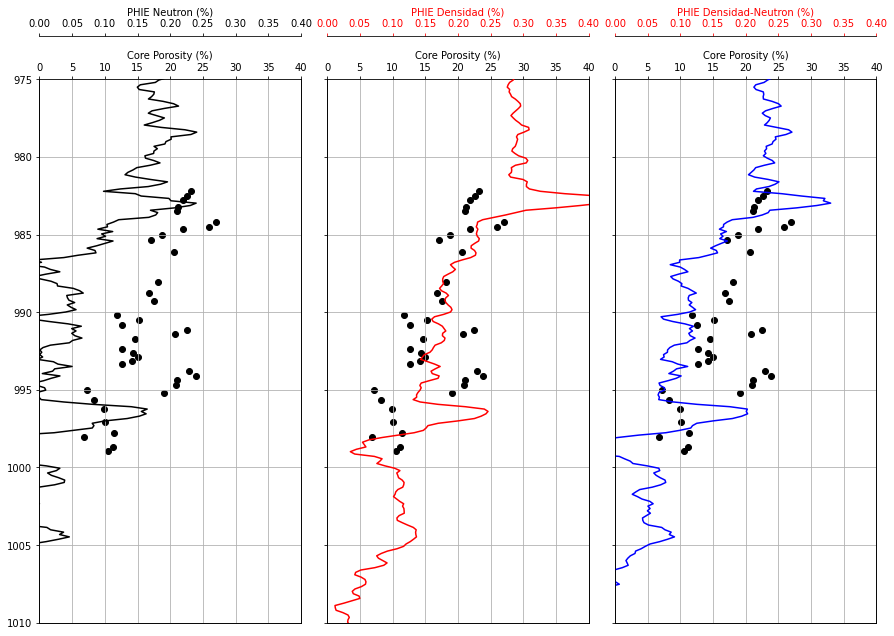

In [ ]:
fig, axes = plt.subplots(figsize=(15,10),sharey=True)

ax1 = plt.subplot2grid((1,3),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = plt.subplot2grid((1,3),(0,1),rowspan=1,colspan=1)
ax4 = ax3.twiny()
ax5 = plt.subplot2grid((1,3),(0,2),rowspan=1,colspan=1)
ax6 = ax5.twiny()

ax1.scatter("Poro_Core_%","MD",data=core_13JND,color="black")
ax1.set_xlabel("Core Porosity (%)",color="black")
ax1.tick_params(axis="x",colors="black")
ax1.set_xlim(0,40)

ax2.plot("PHIEn","MD",data=registro_13JND,color="black")
ax2.set_xlim(0,0.4)
ax2.set_xlabel("PHIE Neutron (%)",color="black")
ax2.tick_params(axis="x",colors="black")

ax3.scatter("Poro_Core_%","MD",data=core_13JND,color="black")
ax3.set_xlabel("Core Porosity (%)",color="black")
ax3.tick_params(axis="x",colors="black")
ax3.set_xlim(0,40)

ax4.plot("PHIEd","MD",data=registro_13JND,color="red")
ax4.set_xlim(0,0.4)
ax4.set_xlabel("PHIE Densidad (%)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.scatter("Poro_Core_%","MD",data=core_13JND,color="black")
ax5.set_xlabel("Core Porosity (%)",color="black")
ax5.tick_params(axis="x",colors="black")
ax5.set_xlim(0,40)

ax6.plot("PHIEn-d","MD",data=registro_13JND,color="blue")
ax6.set_xlim(0,0.4)
ax6.set_xlabel("PHIE Densidad-Neutron (%)",color="red")
ax6.tick_params(axis="x",colors="red")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1010,975)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==3 or i==5:
        ax.spines["top"].set_position(("axes",1.08))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.1)

In [ ]:
for fila, valores in core_13JND.iterrows():
    if valores["MD"]<=995.2:
        valores["MD"] = valores["MD"]+2
        core_13JND.iloc[fila,1] = valores["MD"]
    else:
        valores["MD"] = valores["MD"]+3.5
        core_13JND.iloc[fila,1] = valores["MD"]

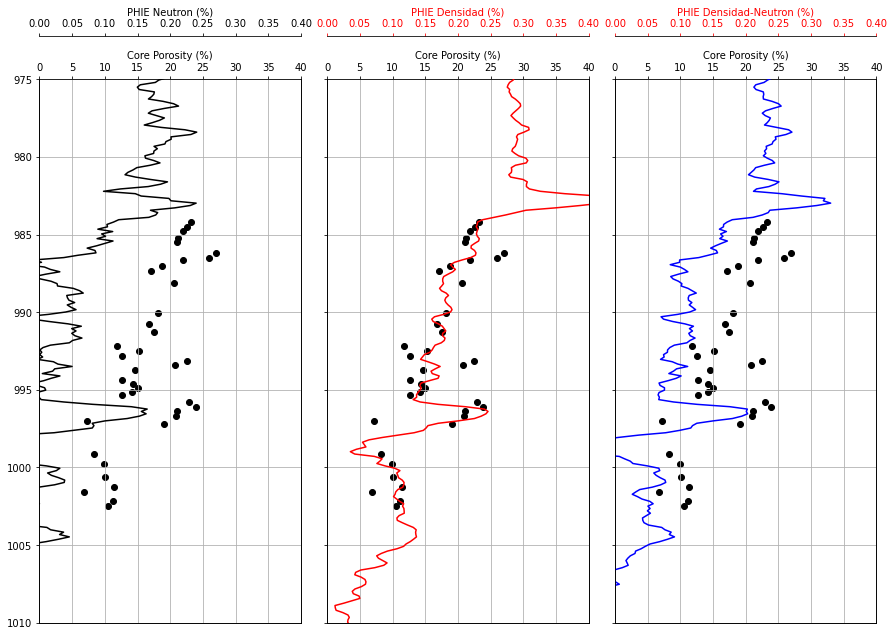

In [ ]:
fig, axes = plt.subplots(figsize=(15,10),sharey=True)

ax1 = plt.subplot2grid((1,3),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = plt.subplot2grid((1,3),(0,1),rowspan=1,colspan=1)
ax4 = ax3.twiny()
ax5 = plt.subplot2grid((1,3),(0,2),rowspan=1,colspan=1)
ax6 = ax5.twiny()

ax1.scatter("Poro_Core_%","MD",data=core_13JND,color="black")
ax1.set_xlabel("Core Porosity (%)",color="black")
ax1.tick_params(axis="x",colors="black")
ax1.set_xlim(0,40)

ax2.plot("PHIEn","MD",data=registro_13JND,color="black")
ax2.set_xlim(0,0.4)
ax2.set_xlabel("PHIE Neutron (%)",color="black")
ax2.tick_params(axis="x",colors="black")

ax3.scatter("Poro_Core_%","MD",data=core_13JND,color="black")
ax3.set_xlabel("Core Porosity (%)",color="black")
ax3.tick_params(axis="x",colors="black")
ax3.set_xlim(0,40)

ax4.plot("PHIEd","MD",data=registro_13JND,color="red")
ax4.set_xlim(0,0.4)
ax4.set_xlabel("PHIE Densidad (%)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.scatter("Poro_Core_%","MD",data=core_13JND,color="black")
ax5.set_xlabel("Core Porosity (%)",color="black")
ax5.tick_params(axis="x",colors="black")
ax5.set_xlim(0,40)

ax6.plot("PHIEn-d","MD",data=registro_13JND,color="blue")
ax6.set_xlim(0,0.4)
ax6.set_xlabel("PHIE Densidad-Neutron (%)",color="red")
ax6.tick_params(axis="x",colors="red")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1010,975)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==3 or i==5:
        ax.spines["top"].set_position(("axes",1.08))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.1)

In [ ]:
from google.colab import files
core_13JND.to_excel("Core Calibrado 7-JND-13D-BA AG.xlsx",index=False)
files.download("Core Calibrado 7-JND-13D-BA AG.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

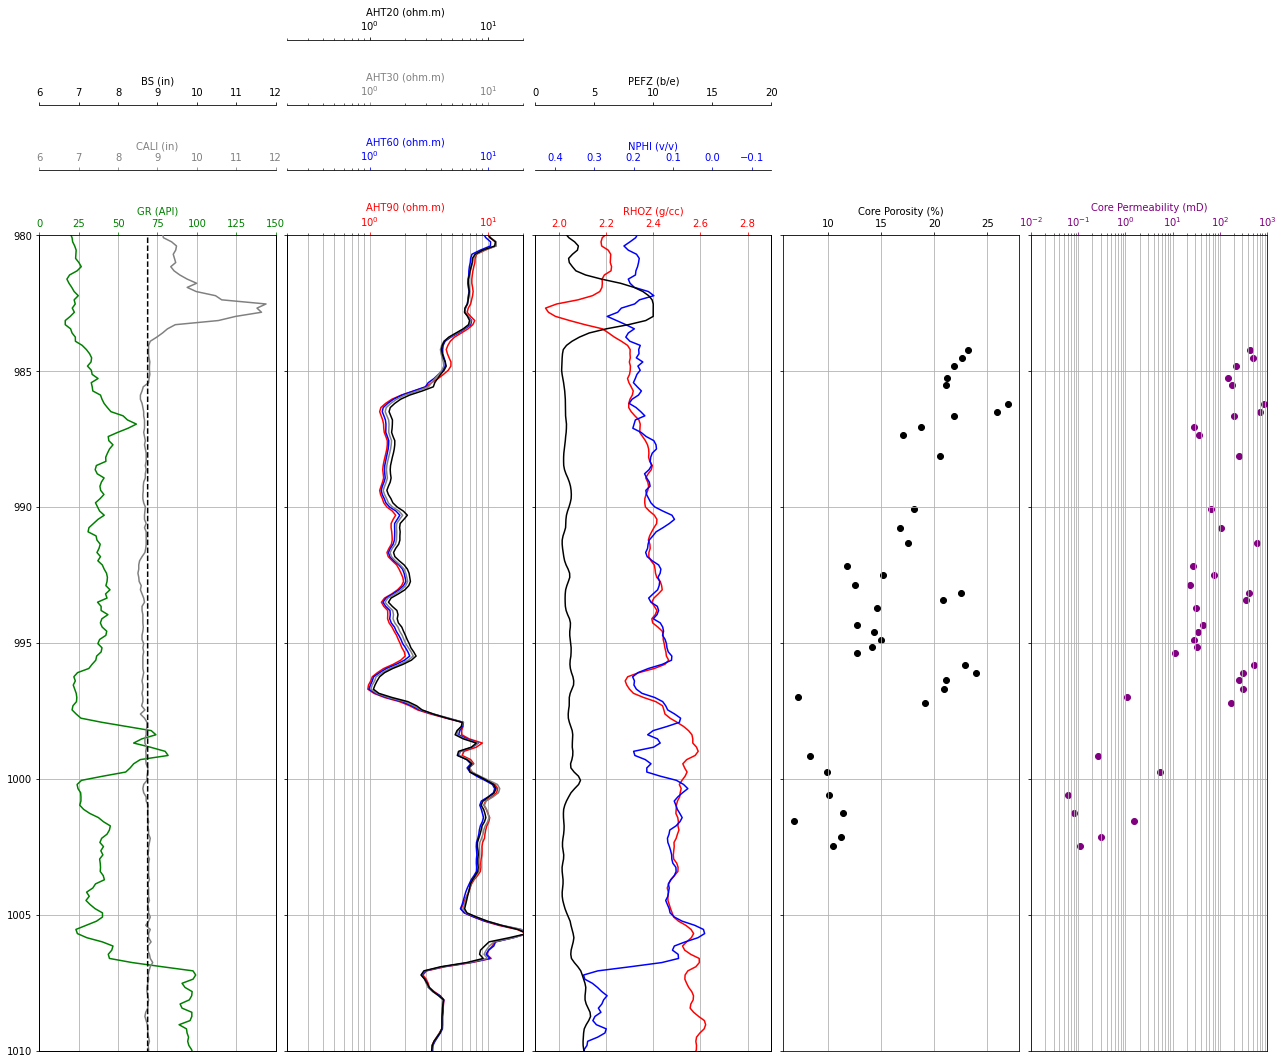

In [ ]:
fig, axes = plt.subplots(figsize=(22,15),sharey=True)

ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax7 = ax4.twiny()
ax8 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax11 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax12 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)


ax1.plot("GR","MD",data=registro_13JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("HCAL","MD",data=registro_13JND,color="gray")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="gray")
ax2.tick_params(axis="x",colors="gray")

ax3.plot("BS","MD",data=registro_13JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("AHT90","MD",data=registro_13JND,color="red")
ax4.set_xlim(0.2,20)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("AHT90 (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("AHT60","MD",data=registro_13JND,color="blue")
ax5.set_xlim(0.2,20)
ax5.semilogx()
ax5.set_xlabel("AHT60 (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("AHT30","MD",data=registro_13JND,color="gray")
ax6.set_xlim(0.2,20)
ax6.semilogx()
ax6.set_xlabel("AHT30 (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax7.plot("AHT20","MD",data=registro_13JND,color="black")
ax7.set_xlim(0.2,20)
ax7.semilogx()
ax7.set_xlabel("AHT20 (ohm.m)",color="black")
ax7.tick_params(axis="x",colors="black")

ax8.plot("RHOZ","MD",data=registro_13JND,color="red")
ax8.set_xlim(1.9,2.9)
ax8.grid(which="minor")
ax8.set_xlabel("RHOZ (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHI","MD",data=registro_13JND,color="blue")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHI (v/v)",color="blue")
ax9.tick_params(axis="x",colors="blue")

ax10.plot("PEFZ","MD",data=registro_13JND,linestyle="-",color="black")
ax10.set_xlim(0,20)
ax10.set_xlabel("PEFZ (b/e)",color="black")
ax10.tick_params(axis="x",colors="black")

ax11.scatter("Poro_Core_%","MD",data=core_13JND,color="black")
ax11.set_xlabel("Core Porosity (%)",color="black")
ax11.tick_params(axis="x",colors="black")

ax12.scatter("Kh_mD","MD",data=core_13JND,color="purple")
ax12.semilogx()
ax12.set_xlim(0.01,1000)
ax12.grid(which="minor")
ax12.set_xlabel("Core Permeability (mD)",color="purple")
ax12.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1010,980)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==8:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==9:
        ax.spines["top"].set_position(("axes",1.16))
    elif i==6:
        ax.spines["top"].set_position(("axes",1.24))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

#Sergi

##7-RO-14-BA

In [ ]:
core_7RO = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-RO-14-BA/Core Final 7-RO-14-BA SER.xlsx"
core_7RO = pd.read_excel(core_7RO)

In [ ]:
core_7RO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MD           280 non-null    float64
 1   Poro_Core_%  276 non-null    float64
 2   Kh_mD        265 non-null    float64
 3   LogKh_mD     265 non-null    float64
dtypes: float64(4)
memory usage: 8.9 KB


In [ ]:
registro_7RO = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-RO-14-BA/7-RO-14-BA.las"
registro_7RO = np.loadtxt(registro_7RO,skiprows=47)
registro_7RO[registro_7RO==-999.0000]=np.nan
registro_7RO = pd.DataFrame(registro_7RO,columns=["MD","GR","CAL","SP","VCL","SN","RILD","RHOB","CNSS",
                                                    "DRHO","PHIT","PHIE"])

In [ ]:
registro_7RO["RHOB"] = registro_7RO["RHOB"]/1000
registro_7RO["DRHO"] = registro_7RO["DRHO"]/1000

In [ ]:
registro_7RO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MD      1541 non-null   float64
 1   GR      1527 non-null   float64
 2   CAL     1541 non-null   float64
 3   SP      1541 non-null   float64
 4   VCL     1540 non-null   float64
 5   SN      1541 non-null   float64
 6   RILD    1541 non-null   float64
 7   RHOB    1541 non-null   float64
 8   CNSS    1540 non-null   float64
 9   DRHO    1541 non-null   float64
 10  PHIT    901 non-null    float64
 11  PHIE    901 non-null    float64
dtypes: float64(12)
memory usage: 144.6 KB


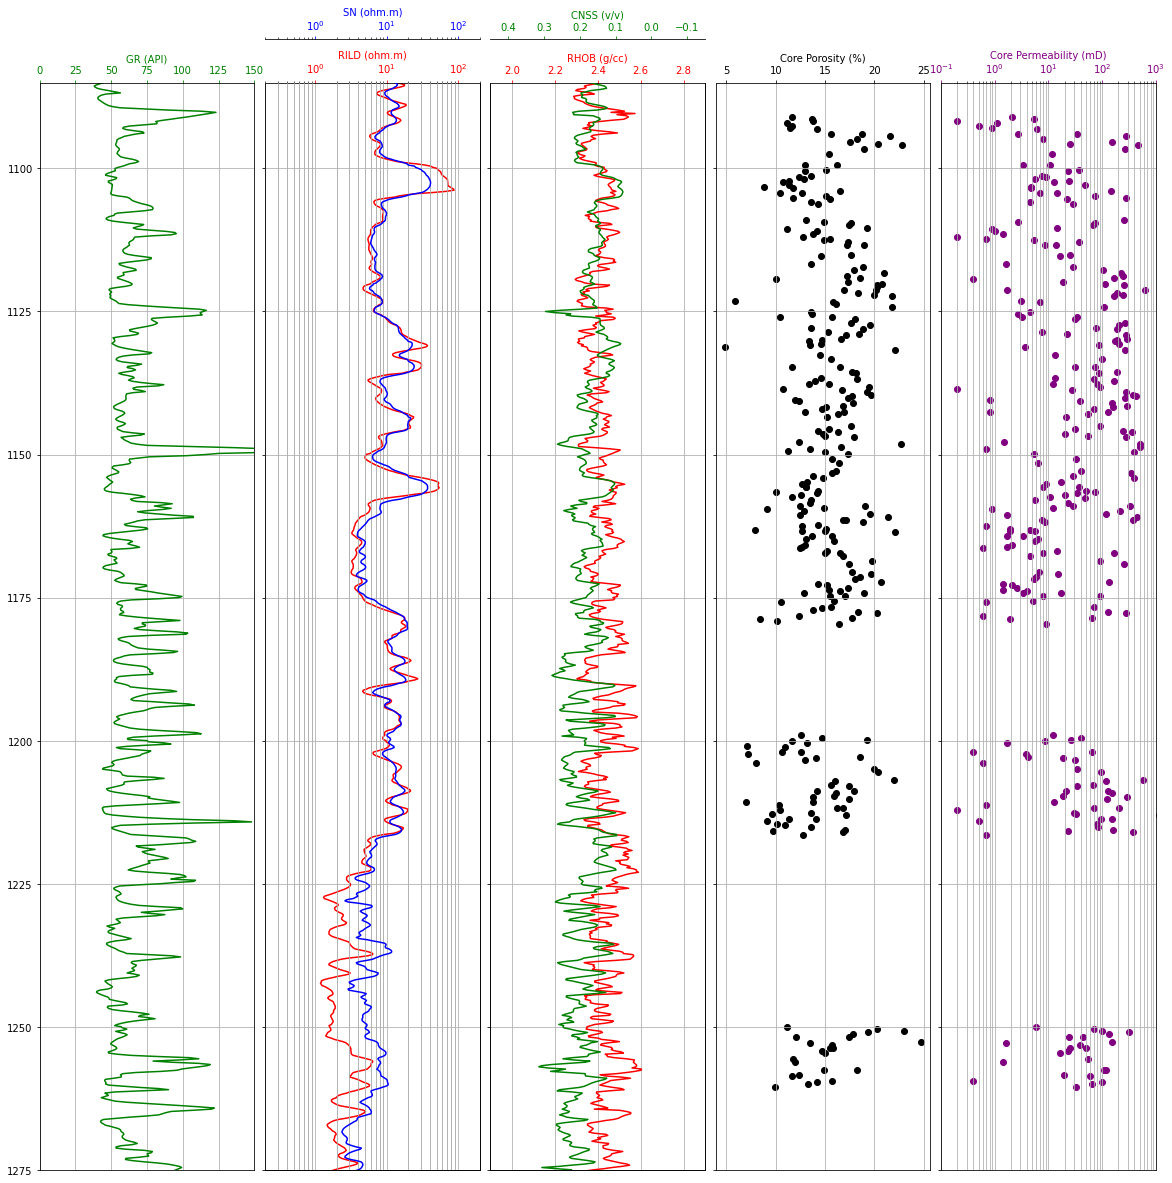

In [ ]:
import enum
fig, axes = plt.subplots(figsize=(20,20),sharey=True)

ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax7 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7RO,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("RILD","MD",data=registro_7RO,color="red")
ax2.set_xlim(0.2,200)
ax2.semilogx()
ax2.grid(which="minor")
ax2.set_xlabel("RILD (ohm.m)",color="red")
ax2.tick_params(axis="x",colors="red")

ax3.plot("SN","MD",data=registro_7RO,color="blue")
ax3.set_xlim(0.2,200)
ax3.semilogx()
ax3.grid(which="minor")
ax3.set_xlabel("SN (ohm.m)",color="blue")
ax3.tick_params(axis="x",colors="blue")

ax4.plot("RHOB","MD",data=registro_7RO,color="red")
ax4.set_xlim(1.9,2.9)
ax4.grid(which="minor")
ax4.set_xlabel("RHOB (g/cc)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("CNSS","MD",data=registro_7RO,color="green")
ax5.set_xlim(0.45,-0.15)
ax5.set_xlabel("CNSS (v/v)",color="green")
ax5.tick_params(axis="x",colors="green")

ax6.scatter("Poro_Core_%","MD",data=core_7RO,color="black")
ax6.set_xlabel("Core Porosity (%)",color="black")
ax6.tick_params(axis="x",colors="black")

ax7.scatter("Kh_mD","MD",data=core_7RO,color="purple")
ax7.semilogx()
ax7.set_xlim(0.1,1000)
ax7.grid(which="minor")
ax7.set_xlabel("Core Permeability (mD)",color="purple")
ax7.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1275,1085)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==2 or i==4:
        ax.spines["top"].set_position(("axes",1.04))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax7]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
GRmax7ro = registro_7RO["GR"].max()
GRmin7ro = registro_7RO["GR"].min()

In [ ]:
registro_7RO["Vshlin"] = (registro_7RO["GR"]-GRmin7ro)/(GRmax7ro-GRmin7ro)

In [ ]:
registro_7RO.loc[registro_7RO["GR"]==GRmax7ro,["CNSS"]]

,CNSS
321,0.1815


In [ ]:
Neutron_Shale7RO = 0.45

In [ ]:
registro_7RO["PHIEn"] = registro_7RO["CNSS"] - registro_7RO["Vshlin"]*Neutron_Shale7RO

In [ ]:
for fila, valores in core_7RO.iterrows():
    if 1091.05<=valores["MD"]<=1179.59:
        valores["MD"] = valores["MD"]+1
        core_7RO.iloc[fila,0] = valores["MD"]
    elif 1199.07<=valores["MD"]<=1203.91:
        valores["MD"] = valores["MD"]-3.5
        core_7RO.iloc[fila,0] = valores["MD"]
    elif 1250.5<=valores["MD"]<=1256.11:
        valores["MD"] = valores["MD"]-1
        core_7RO.iloc[fila,0] = valores["MD"]
    elif 1257.54<=valores["MD"]<=1260.52:
        valores["MD"] = valores["MD"]-1.5
        core_7RO.iloc[fila,0] = valores["MD"]

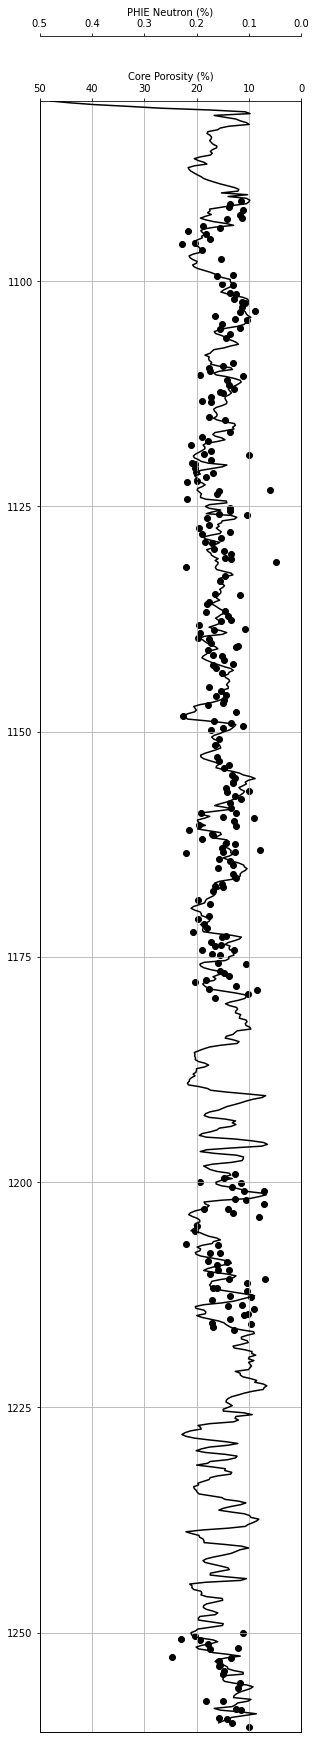

In [ ]:
fig, axes = plt.subplots(figsize=(15,30),sharey=True)

ax1 = plt.subplot2grid((1,3),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()

ax1.scatter("Poro_Core_%","MD",data=core_7RO,color="black")
ax1.set_xlabel("Core Porosity (%)",color="black")
ax1.tick_params(axis="x",colors="black")
ax1.set_xlim(50,0)

ax2.plot("PHIT","MD",data=registro_7RO,color="black")
ax2.set_xlim(0.5,0)
ax2.set_xlabel("PHIE Neutron (%)",color="black")
ax2.tick_params(axis="x",colors="black")


for i, ax in enumerate(fig.axes):
    ax.set_ylim(1261,1080)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1:
        ax.spines["top"].set_position(("axes",1.04))
    else:
        ax.grid()

for ax in [ax2]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.1)

In [ ]:
not_Nan = core_7RO["Kh_mD"].notnull().values
core_7RO = core_7RO[not_Nan]
not_Nan = core_7RO["Poro_Core_%"].notnull().values
core_7RO = core_7RO[not_Nan]

In [ ]:
core_7RO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 279
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MD           264 non-null    float64
 1   Poro_Core_%  264 non-null    float64
 2   Kh_mD        264 non-null    float64
 3   LogKh_mD     264 non-null    float64
dtypes: float64(4)
memory usage: 10.3 KB


In [ ]:
core_7RO = core_7RO.sort_values(by=["MD"])

In [ ]:
from google.colab import files
core_7RO.to_excel("Core Calibrado 7-RO-14-BA SER.xlsx",index=False)
files.download("Core Calibrado 7-RO-14-BA SER.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

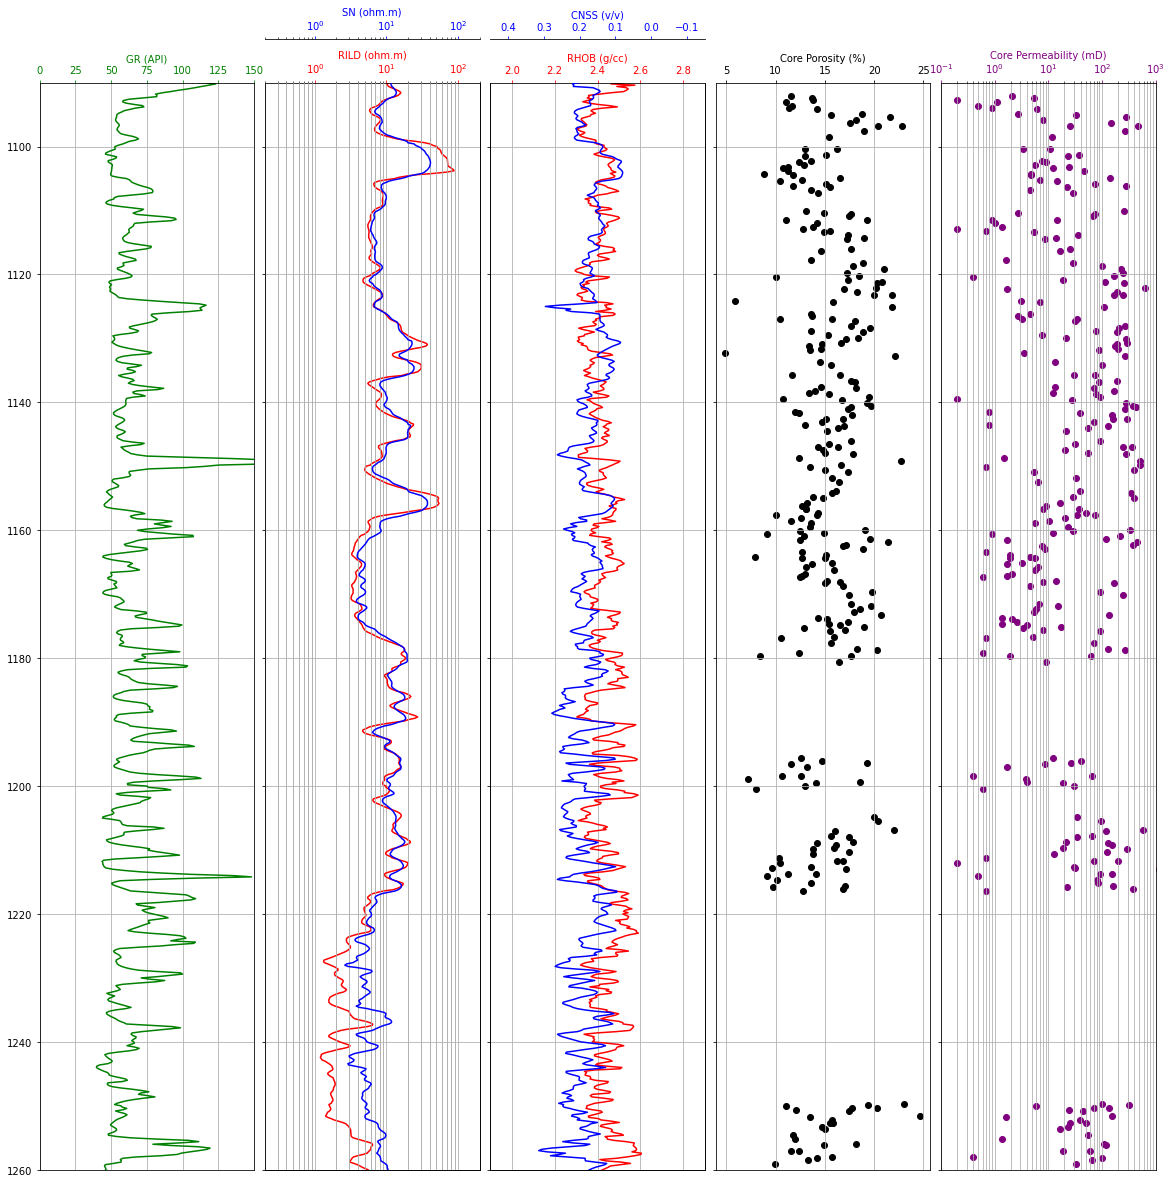

In [ ]:
import enum
fig, axes = plt.subplots(figsize=(20,20),sharey=True)

ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax7 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7RO,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("RILD","MD",data=registro_7RO,color="red")
ax2.set_xlim(0.2,200)
ax2.semilogx()
ax2.grid(which="minor")
ax2.set_xlabel("RILD (ohm.m)",color="red")
ax2.tick_params(axis="x",colors="red")

ax3.plot("SN","MD",data=registro_7RO,color="blue")
ax3.set_xlim(0.2,200)
ax3.semilogx()
ax3.grid(which="minor")
ax3.set_xlabel("SN (ohm.m)",color="blue")
ax3.tick_params(axis="x",colors="blue")

ax4.plot("RHOB","MD",data=registro_7RO,color="red")
ax4.set_xlim(1.9,2.9)
ax4.grid(which="minor")
ax4.set_xlabel("RHOB (g/cc)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("CNSS","MD",data=registro_7RO,color="blue")
ax5.set_xlim(0.45,-0.15)
ax5.set_xlabel("CNSS (v/v)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.scatter("Poro_Core_%","MD",data=core_7RO,color="black")
ax6.set_xlabel("Core Porosity (%)",color="black")
ax6.tick_params(axis="x",colors="black")

ax7.scatter("Kh_mD","MD",data=core_7RO,color="purple")
ax7.semilogx()
ax7.set_xlim(0.1,1000)
ax7.grid(which="minor")
ax7.set_xlabel("Core Permeability (mD)",color="purple")
ax7.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1260,1090)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==2 or i==4:
        ax.spines["top"].set_position(("axes",1.04))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax7]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)